In [1]:
import matplotlib.pyplot as plt
import numpy as np
import NeuralNetwork as nn


## Functions for plotting and running networks

In [2]:

verbose = False

def train_example(lrs):
    w=np.array([[[.15,.2,.35],[.25,.3,.35]],[[.4,.45,.6],[.5,.55,.6]]])
    x=np.array([0.05,0.1])
    y=np.array([0.01,0.99])
    num_neurons = [2, 2]
    loss_lrs = []
    for lr in lrs:
        n = nn.NeuralNetwork(len(num_neurons), num_neurons, len(x), 1, 0, lr, w)
        loss = []
        for i in range(1001):
            yp = n.train(x, y)
            loss.append(n.e_total)
            if(verbose and i % 100 == 0):
                print("interation:", i)
                print("output: ", yp, y)
                print("Error", n.e_total)
                print()
        loss_lrs.append(loss)
    return loss_lrs

def train_and(lrs):
    #training samples
    x=[[0, 0], [0, 1], [1, 0], [1, 1]]
    #training labels
    y=[0.0, 0.0, 0.0, 1.0]
    y = np.asarray(y)
    num_neurons = [1]

    loss_lrs = []
    for lr in lrs:
        n = nn.NeuralNetwork(len(num_neurons), num_neurons, 2, 1, 1, lr)
        loss = []
        for e in range(101):
            for i in range(len(x)):
                yp = n.train(x[i], y[i])
            loss.append(n.e_total)
            if(verbose and e % 100 == 0):
                print("interation:", e)
                
                for i in range(len(x)):
                    print("sample", i)
                    yp = n.train(x[i], y[i])
                    print("\tintput: ", x[i])
                    print("\toutput: ", yp)
                    print("\tground truth: ", y[i])
                
                print("Error", n.e_total)
        loss_lrs.append(loss)
    return loss_lrs

def train_xor_single_perceptron(lrs):
    #training samples
    x=[[0, 0], [0, 1], [1, 0], [1, 1]]
    #training labels
    y=[0.0, 1.0, 1.0, 0.0]
    y = np.asarray(y)
    num_neurons = [1]

    loss_lrs = []
    for lr in lrs:
        n = nn.NeuralNetwork(len(num_neurons), num_neurons, 2, 1, 1, lr)
        loss = []
        for e in range(5001):
            for i in range(len(x)):
                yp = n.train(x[i], y[i])

            loss.append(n.e_total)
            if(verbose and e % 100 == 0):
                print("interation:", e)
                
                for i in range(len(x)):
                    print("sample", i)
                    yp = n.train(x[i], y[i])
                    print("\tintput: ", x[i])
                    print("\toutput: ", yp)
                    print("\tground truth: ", y[i])
                
                print("Error", n.e_total)
        loss_lrs.append(loss)
    return loss_lrs

def train_xor_hidden_layer(lrs):
    #training samples
    x=[[0, 0], [0, 1], [1, 0], [1, 1]]
    #training labels
    y=[0.0, 1.0, 1.0, 0.0]
    y = np.asarray(y)
    num_neurons = [2, 1]

    loss_lrs = []
    for lr in lrs:
        n = nn.NeuralNetwork(len(num_neurons), num_neurons, 2, 1, 1, lr)
        loss = []
        for e in range(5001):
            for i in range(len(x)):
                yp = n.train(x[i], y[i])

            loss.append(n.e_total)
            if(verbose and e % 100 == 0):
                print("interation:", e)
                
                for i in range(len(x)):
                    print("sample", i)
                    yp = n.train(x[i], y[i])
                    print("\tintput: ", x[i])
                    print("\toutput: ", yp)
                    print("\tground truth: ", y[i])
                
                print("Error", n.e_total)
        loss_lrs.append(loss)
    return loss_lrs

def plot_loss_lrs(loss_lrs, name, ylabel="Binary Cross Enropy Loss", log=True):
    for i, loss_lr in enumerate(loss_lrs):
        plt.plot(loss_lr, label=f'lr = {round(lrs[i],2)}')

    plt.legend()
    plt.title(name)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    if log:
        plt.yscale("log")
    plt.savefig(f'{name}.png')
    plt.show()

## Example loss vs epochs

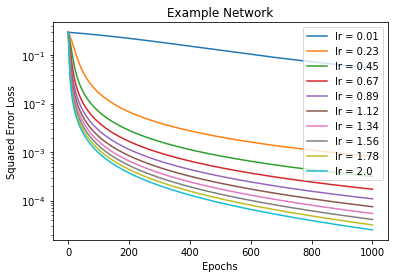

In [3]:
lrs = np.linspace(0.01, 2, 10)
plot_loss_lrs(train_example(lrs), "Example Network", ylabel="Squared Error Loss", log=True)

## AND loss vs epochs

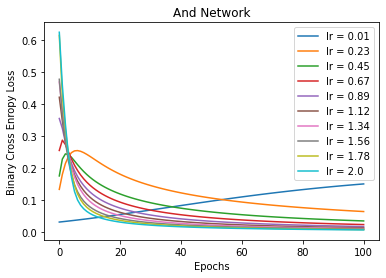

In [4]:
plot_loss_lrs(train_and(lrs), "And Network", log=False)

## XOR Single Perceptron loss vs epochs

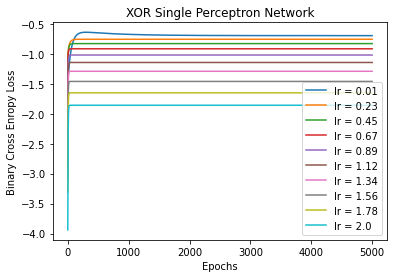

In [5]:
plot_loss_lrs(train_xor_single_perceptron(lrs), "XOR Single Perceptron Network", log=False)

## XOR Hidden Layer loss vs epochs

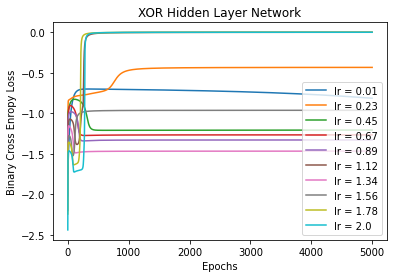

In [6]:
plot_loss_lrs(train_xor_hidden_layer(lrs), "XOR Hidden Layer Network", log=False)